**Due Date: Monday, February 19th, 11:59pm**

- Save a copy of the notebook to your Google Drive. You can do that by going to the menu and clicking `File` > `Save` > `SAVE A COPY IN DRIVE`.
- Fill out the missing parts and run the code modules.
- Answer the questions (if any) in a separate document or by adding a new `Text` block inside the Colab.
- Download the solved notebook by going to the menu and clicking `File` > `Download .ipynb`.
- Make sure the downloaded version is showing your solutions.
- Upload your solutions to BruinLearn (under "Colab Assignment #4: Prediction - Regression").

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

Download the data for house prices.

In [2]:
!wget -O house_prices.csv https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0

--2024-02-15 23:42:27--  https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v14nl9kcgqoqn36/house_prices.csv [following]
--2024-02-15 23:42:28--  https://www.dropbox.com/s/raw/v14nl9kcgqoqn36/house_prices.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc365e1cb144aff67e940a31bc73.dl.dropboxusercontent.com/cd/0/inline/CNWC1xRovFU6pn7EknIyc46GnOcTbCUGdh-pKvaDUTMgyFsFuBuuE-wOJLno7HJIMGTqe5G3xRoWLyhDRkVwLK_ZG9XXCEX4U4HTcgx1g27ZDjV8W6eUuX1gBvB4SC-nQLc/file# [following]
--2024-02-15 23:42:28--  https://uc365e1cb144aff67e940a31bc73.dl.dropboxusercontent.com/cd/0/inline/CNWC1xRovFU6pn7EknIyc46GnOcTbCUGdh-pKvaDUTMgyFsFuBuuE-wOJLno7HJIMGTqe5G3xRoWLyhDRkVwLK_ZG9XXCEX4U4HTcgx1g2

Load the data.

In [3]:
prices_data = pd.read_csv("house_prices.csv")
prices_data = prices_data.drop("house_type", axis = 1)

print("The first three rows of the data are:")
prices_data.head(3)

The first three rows of the data are:


,sqft,age,price
0,1380.0,1.873884,231430.0
1,2137.0,0.655100,276776.0
2,1639.0,22.591568,199513.0


Add a number of additional features to the dataset.

In [4]:
prices_data = prices_data.assign(
    age_sqr = prices_data.age**2,
    age_cub = prices_data.age**3,
    age_log = np.log(prices_data.age),
    age_sqrt = np.sqrt(prices_data.age),
    sqft_sqr = prices_data.sqft**2,
    sqft_cub = prices_data.sqft**3,
    sqft_log = np.log(prices_data.sqft),
    sqft_sqrt = np.sqrt(prices_data.sqft),
    sqft_x_age = prices_data.sqft * prices_data.age
)

print("The first three rows of the updated dataset are:")
prices_data.head(3)

The first three rows of the updated dataset are:


,sqft,age,price,age_sqr,age_cub,age_log,age_sqrt,sqft_sqr,sqft_cub,sqft_log,sqft_sqrt,sqft_x_age
0,1380.0,1.873884,231430.0,3.511440,6.580029,0.628013,1.368899,1904400.0,2.628072e+09,7.229839,37.148351,2585.959380
1,2137.0,0.655100,276776.0,0.429156,0.281140,-0.422967,0.809383,4566769.0,9.759185e+09,7.667158,46.227697,1399.949311
2,1639.0,22.591568,199513.0,510.378927,11530.260041,3.117577,4.753059,2686321.0,4.402880e+09,7.401842,40.484565,37027.579316


Separate features and labels into two different variables.

In [5]:
X = prices_data.drop("price", axis=1)
y = prices_data.price

Divide the data into train/test datasets using a 70/30 split.

In [6]:
# TODO: Assign the right values to X_train, X_test, y_train and y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)


print("shape of X_train is: ", X_train.shape)
print("shape of X_test is: ", X_test.shape)

shape of X_train is:  (140, 11)
shape of X_test is:  (60, 11)


##Linear Regression for Prediction

Fit a linear regression model to the train data, and compute the RMSE of the fitted model in the training data and the test data.

In [8]:
# TODO: Compute rmse_train and rmse_test
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit for training data
model.fit(X_train, y_train)
preds_train = model.predict(X_train)

# Fit for test data
model.fit(X_test, y_test)
preds_test = model.predict(X_test)

rmse_train = np.sqrt(np.mean((preds_train - y_train)**2))
rmse_test = np.sqrt(np.mean((preds_test - y_test)**2))
# END OF TODO

print("Train RMSE of the linear regression model is: ", rmse_train)
print("Test RMSE of the linear regression model is: ", rmse_test)

Train RMSE of the linear regression model is:  48371.8335822685
Test RMSE of the linear regression model is:  53626.35772950375


Based on the train and test RMSE's, do you see any overfitting in the model?

Yes, because the RMSE of the test data is greater than the RMSE of the train data which indicated overfitting.

##$k$-Nearest Neighbors

Fit a KNN model to the train data, and compute the RMSE of the fitted model in the training data and the test data. Use $k = 5$.

In [13]:
# TODO: Compute rmse_train and rmse_test
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 5)

# Fit for training data
model.fit(X_train, y_train)
preds_train = model.predict(X_train)

# Fit for test data
model.fit(X_test, y_test)
preds_test = model.predict(X_test)

rmse_train = np.sqrt(np.mean((preds_train - y_train)**2))
rmse_test = np.sqrt(np.mean((preds_test - y_test)**2))
# END OF TODO

print("Train RMSE of the KNN model is: ", rmse_train)
print("Test RMSE of the KNN regression model is: ", rmse_test)

Train RMSE of the KNN model is:  49904.32879909604
Test RMSE of the KNN regression model is:  53832.4957459897


Based on train and test RMSE's, do you see any overffiting in the model?

Yes, because the RMSE of the test data is greater than the RMSE of the train data which indicated overfitting.


Between this model and the linear regression model in the previous part, which one do you choose for predicting house prices?

Choose this model because there is less overfitting than we saw in the previous linear regression model.



##Regularization

As we said in the lecture, regularization is one of the methods we can use to alleviate overfitting in our model.
Let's apply regularization to our linear regression model. For this part, we are going to use the L-2 regularized linear regression.

Note: Before applying regularization, we need to normalize the features in our data. As we said in the lecture, L-2 regularization introduces a new term into our objective function, $\lambda \sum \beta_i^2$. If one of the coefficients, $\beta_j$, is much larger compared to the other coefficients then the regularization term is primarily dominated by the value of that coefficient. Normalizing features helps us to avoid problems like that. We can achieve that by using `normalize=True` as the parameter in `Ridge`.

For different values of the regularization hyperparameter, fit a ridge regression to the train data, and compute the RMSE of the fitted model in the training data and the test data.

In [47]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

rmses_train = []
rmses_test = []
lambdas = np.logspace(-4, 3, 100)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for l in lambdas:
  # TODO: Compute rmse_train and rmse_test for ridge regression
  #       Use l as the regularization parameter
  model = Ridge(alpha = l)

  # Fit for training data
  model.fit(X_train_scaled, y_train)
  preds_train = model.predict(X_train_scaled)

  # Fit for test data
  model.fit(X_test_scaled, y_test)
  preds_test = model.predict(X_test_scaled)

  rmse_train = np.sqrt(np.mean((preds_train - y_train)**2))
  rmse_test = np.sqrt(np.mean((preds_test - y_test)**2))
  # END OF TODO

  rmses_train.append(rmse_train)
  rmses_test.append(rmse_test)

print(rmses_train)


print(rmses_test)



[48624.46684133648, 48626.90740835717, 48629.849737553785, 48633.43111803689, 48637.80030907365, 48643.11229608414, 48649.52016775883, 48657.16419279147, 48666.15875117814, 48676.57844338662, 48688.445299199964, 48701.71932840391, 48716.294511103704, 48732.0016392871, 48748.61828744046, 48765.884872297254, 48783.52460979997, 48801.264501167025, 48818.85443091605, 48836.08199540237, 48852.78159903431, 48868.837397470044, 48884.18060510732, 48898.78238037954, 48912.643907130696, 48925.78541572431, 48938.23577011347, 48950.023930995674, 48961.173142338965, 48971.698149176365, 48981.60522830733, 48990.89439513272, 48999.56291174733, 49007.60918944615, 49015.036324739776, 49021.85476318143, 49028.08386789633, 49033.752411418645, 49038.89817162451, 49043.56688821414, 49047.81084178383, 49051.68728079213, 49055.256870896614, 49058.58229766349, 49061.727128605206, 49064.75503369412, 49067.729464638476, 49070.71388506692, 49073.77260758723, 49076.9722163315, 49080.383434752504, 49084.0831550686

Draw the train and test RMSE for different values of the regularization hyperparameter.

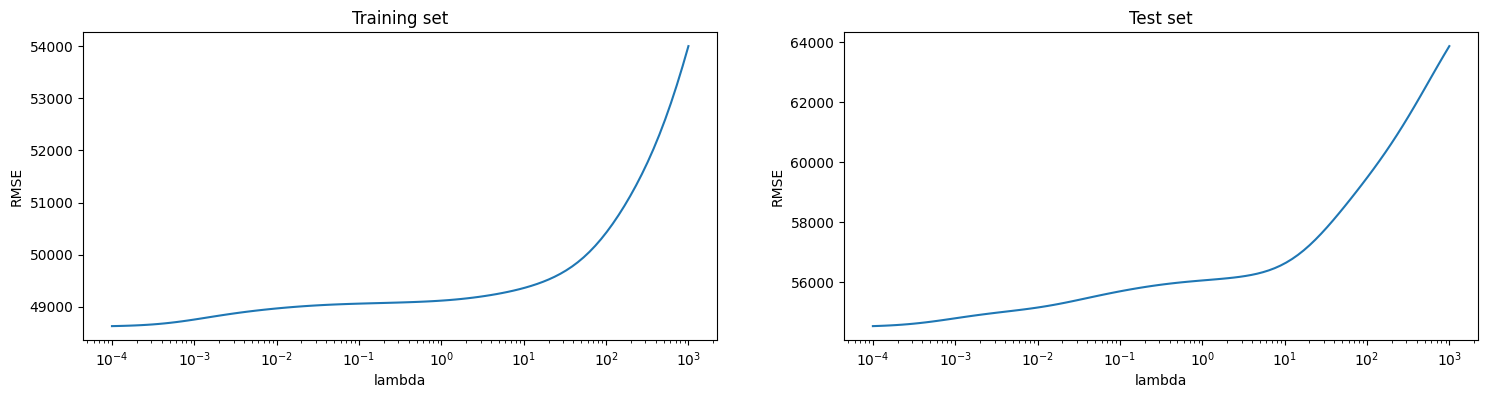

In [42]:
plt.figure(figsize=(18, 4))

plt.subplot(121)
ax = plt.gca()
ax.plot(lambdas, rmses_train)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Training set")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(lambdas, rmses_test)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Test set")
plt.axis("tight")

plt.show()

- How does the test RMSE of the best ridge regression model compares to the linear regression model? What about the KNN model?

We see larger values for the test RMSE of the ridge regression than we did for either the test RMSE of the linear regression model or the test RMSE of the KNN model.

- Did regularization help with overfitting in the linear regression model?
Yes, regularization helps mitigate overfitting in linear regression models by limiting the size of the coefficients and controlling the complexity of the mdoel.


- Based on error in train and test sets, does the best ridge regression model show any overfitting?

Yes, because the RMSE of the test data is greater than the RMSE of the train data which indicated overfitting.


- Is the error of the best ridge regression model a good estimate for its generalization error?

Yes, the error of the best ridge regression model would provide us a reasonable estimate for the generalization error.